In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import reuters

In [30]:
from tensorflow.keras import models,layers,optimizers,utils,metrics

In [5]:
import numpy as np

In [6]:
from tensorflow.keras.datasets import reuters

In [7]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 3s 1us/step


In [40]:
print(train_labels[0])
print(train_data[0])

3
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [16]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
    

In [17]:
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

In [24]:
x_val = x_train[:1000]
x_partial_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
y_partial_train = one_hot_train_labels[1000:]

In [25]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history=model.fit(x_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 48ms/step - loss: 2.5601 - acc: 0.5390 - val_loss: 1.6854 - val_acc: 0.6580
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.3631 - acc: 0.7166 - val_loss: 1.2660 - val_acc: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.0055 - acc: 0.7839 - val_loss: 1.0975 - val_acc: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 37ms/step - loss: 0.7939 - acc: 0.8321 - val_loss: 1.0283 - val_acc: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.6324 - acc: 0.8672 - val_loss: 0.9538 - val_acc: 0.8090
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.5080 - acc: 0.8953 - val_loss: 0.9347 - val_acc: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4095 - acc: 0.9153 - val_loss: 0.8878 - val_acc: 0.8170
Epoch 8/20
16/16 [==============================] - 1s 38ms/step - loss: 0.3339 - a

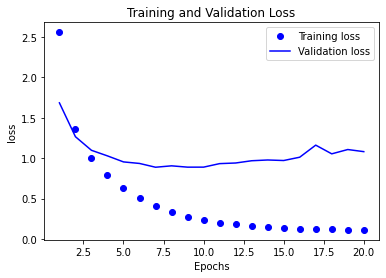

In [46]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()